<a href="https://colab.research.google.com/github/lukmanprasetyo/H8_KS009/blob/master/Advanced_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Visualisasi Menengah 1**

In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
dataset_url = "https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true"

In [3]:
df_can = pd.read_excel(dataset_url,
                  	sheet_name='Canada by Citizenship',
                  	skiprows=range(20),
                  	skipfooter=2)

print('Data downloaded and read into a dataframe')

Data downloaded and read into a dataframe


In [ ]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
print(df_can.shape)

(195, 43)


In [5]:
##Membersihkan data
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

df_can.rename(columns= {'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace = True)

df_can.columns = list(map(str, df_can.columns))

df_can.set_index('Country', inplace = True)

df_can['Total'] = df_can.sum (axis = 1)

years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


## **Visualisasi Data Menggunakan M<tplotlib**

In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')


print('Matplotlib Version : ', mpl.__version__)

Matplotlib Version :  3.2.2


## **Waffle Charts** 

In [ ]:
Waffle Charts

In [8]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [10]:
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value)/ total_values) for value in df_dsn['Total']]

for i, proportion in enumerate(category_proportions):
  print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [11]:
width = 40
height = 10

total_num_tiles = width*height
print('Total number of tiles is', total_num_tiles)

Total number of tiles is 400


In [12]:
tiles_per_category = [round(proportion*total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
  print (df_dsn.index.values[i]+': '+str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [14]:
from pandas.core.indexes import category
waffle_chart = np.zeros((height, width))

category_index = 0
tile_index = 0

for col in range(width):
  for row in range(height):
    tile_index += 1

    if tile_index > sum(tiles_per_category[0:category_index]):
      category_index +=1

    waffle_chart[row, col] = category_index
print('Waffle chart populated!')

Waffle chart populated!


In [15]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

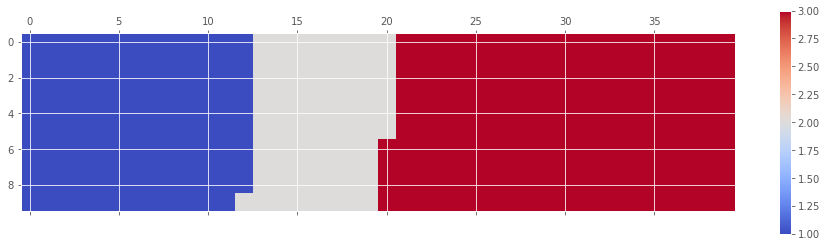

In [16]:
fig = plt.figure()

#digunakan untuk membuat waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], <a list of 0 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

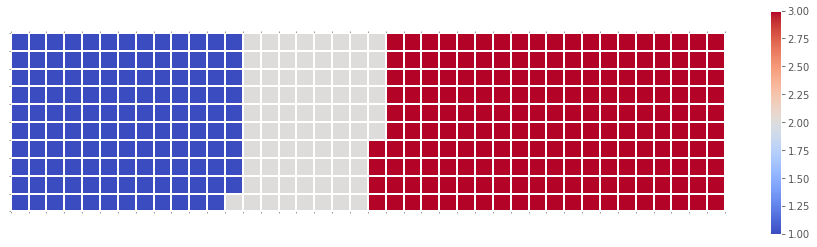

In [18]:
#mempercantik

fig = plt.figure()

#digunakan untuk membuat waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

#membuat sumbu
ax = plt.gca()

#membuat centang
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

#membuat garis
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

In [ ]:
#mempercantik

fig = plt.figure()

#digunakan untuk membuat waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

#membuat sumbu
ax = plt.gca()

#membuat centang
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

#membuat garis
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

#menambahkan legend, kalimat dibagian bawah

legend_handles = []
